# <center>NORMAL DISTRIBUTION

**Table of contents**
***

1. Introduction.
2. Parameters of the normal distribution. 
3. Properties of the normal distribution.
4. Discussion.
5. References.

**Python libraries**

***

In [224]:
# Pandas for reading and manipulate the datasets
import pandas as pd
# Seaborn and matplotlib for data visualization. 
import seaborn as sns
import matplotlib.pyplot as plt
# Numpy to work with arrays. 
import numpy as np
# Skeworm to create a skew-normal random variable.
from scipy.stats import skewnorm
# norm to create a normal random variable.
from scipy.stats import norm
# To calculate kurtosis values:
from scipy.stats import kurtosis
# To calculate the area under the curve:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1. INTRODUCTION

***

The origin of normal distribution can be linked to gambling. Particularly, to the French mathematician Abraham de Moivre (1667-1754). He was interested in gambling and how to determine probabilities. He was trying to come up with a mathematical expression to find out the probability of 60 or more tails out of 100 coin flips.  The answer was a bell shaped distribution, which it is now referred as normal curve.(1) 

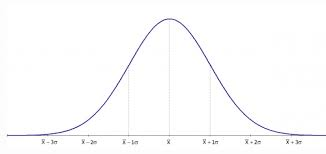


At the beginning, the normal curve was used to analyse the errors in astronomical observations. These errors happened due to instrument imprecision and observers’ built-in bias. Galileo observed these errors were symmetric and also that the small errors were characterized by higher frequency.(1)

Approximately around 1800,  Gauss used the normal distribution to describe the pattern of random measurement error in observational data, and demonstrated that errors were well approximated by the normal curve. However, the term "normal curve" would not appear until 1870.(1,2)

For data scientists, the normal (also referred to as Gaussian) distribution stands out as one of the most commonly used distribution models. 

## 2. PARAMETERS OF THE NORMAL DISTRIBUTION
***

The shape of the bell curve is defined by two parameters, the mean and standard deviation.(3)

### 2.1. MEAN 

The mean defines the central tendency of the normal distribution and the peak of the bell curve. In the normal distribution, most values cluster around the mean.(3)

The formula of the mean is:

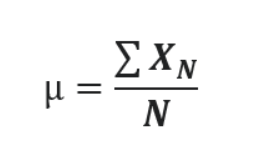

Where:

    µ is the population average.
    ∑XN= sum of N values.
    N = number of values in the population.


**How can we calculate the mean in a normal distribution?**

First, we are going to create a random normal distribution. Then, using numpy we will calculate the mean. We follow the next steps.

In [174]:
# We need to assign a value for the mean and the standard deviation for our random normal distribution.

# The lowercase letter "µ" or "mu" represents the mean. 
mu = 0

# The lowercase letter "σ" or "sigma" represents the standard deviation.
sigma = 1

# In order to create our random normal distribution, we are going to assign a size of 10000 samples.
size = 10000

# "np.random.default_rng" to generate a random sequence of numbers.(4)
rng = np.random.default_rng()

# "rng.normal(mu,sigma,size)" to draw random samples from a normal (Gaussian) distribution.(5)

x = rng.normal(mu,sigma,size)

# Here is our array of 10000 random samples 
x

array([ 0.4230794 , -1.83485671,  0.34539392, ...,  0.05053066,
       -0.3562076 , -1.9005884 ])

In [175]:
# Now we check if our normal distribution follows the given parameters.

# We calculate the mean and the standard deviation using numpy (6,7)
print("Mean =", np.mean(x))
print("Standard deviation =", np.std(x))

Mean = 0.011122561315218703
Standard deviation = 1.0037394147927183


The parameters are correct, let s visualize our data with an histogram and a density curve (**Figure 1**).

A histogram is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable.(13)

A density curve is a curve on a graph that represents the distribution of values in a dataset. It gives us a good idea of the "shape" of a distribution and also where the mean is located.(14)

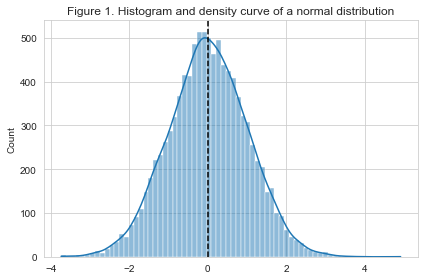

In [176]:
# Figure 1. Histogram and Density curve:

# "sns.set_style('whitegrid')" for adding a white grid in the background.(8)
sns.set_style('whitegrid')
# "sns.histplot" to create the histogram and adding a density curve ""(kde=True)".(9)
sns.histplot(x, kde = True).set(title="Figure 1. Histogram and density curve of a normal distribution")
# "plt.axvline" for adding a vertical line across the axes where the mean is.(10)
plt.axvline(mu, color ="k", linestyle = "dashed")
# To adjust the padding between and around subplots.(11)
plt.tight_layout()

As observed, our random normal distribution has the classic bell shape where most of the values cluster around the mean. This pattern can be observed across different means.(**Figure 2**)

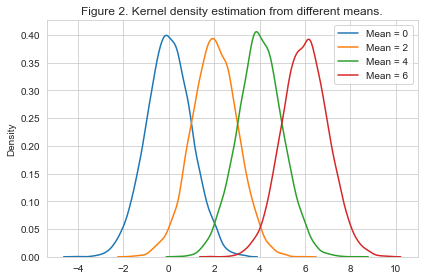

In [177]:
# Figure 2. Kernel density estimation from different means.

# We are going to plot 4 density curves with different means and same sigmas

# We create 4 different random normal distributions:
a3 = rng.normal(0,1,size)
b3 = rng.normal(2,1,size)
c3 = rng.normal(4,1,size)
d3 = rng.normal(6,1,size)

sns.set_style('whitegrid')
# "sns.kdeplot" to plot the kernel density estimation (12)
sns.kdeplot(a3, label = "Mean = 0").set(title="Figure 2. Kernel density estimation from different means.")
sns.kdeplot(b3, label = "Mean = 2")
sns.kdeplot(c3, label = "Mean = 4")
sns.kdeplot(d3, label = "Mean = 6")

plt.legend()
plt.tight_layout()

No matter the mean, most of the values cluster around the mean following the same pattern.

### 2.2. STANDARD DEVIATION

The standard deviation defines the width of the normal distribution. The standard deviation determines how far away from the mean the values tend to fall. It represents the typical distance between the observations and the average.(3)

**Figure 3** shows the density curves of the same sample with same means but different standard deviations. We can observe that larger standard deviations produce wider distributions and also, lower values of standard deviation narrow the
distribution near to the mean. 

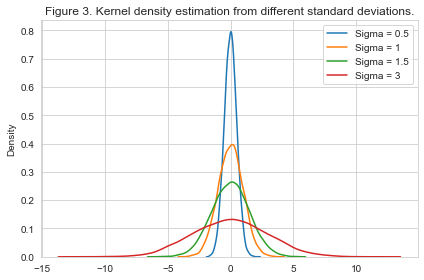

In [178]:
# Figure 3. Kernel density estimation from different standard deviations.

# We are going to plot 4 density curves with same mean and different values of standard deviations. 

# We create 4 different random normal distributions.
a = rng.normal(mu,0.5,size)
b = rng.normal(mu,1,size)
c = rng.normal(mu,1.5,size)
d = rng.normal(mu,3,size)

sns.set_style('whitegrid')
# "sns.kdeplot" to plot the kernel density estimation (12)
sns.kdeplot(a, label = "Sigma = 0.5").set(title="Figure 3. Kernel density estimation from different standard deviations.")
sns.kdeplot(b, label = "Sigma = 1")
sns.kdeplot(c, label = "Sigma = 1.5")
sns.kdeplot(d, label = "Sigma = 3")

plt.legend()
plt.tight_layout()

We can observe that the higher the value of the standard deviation, the wider the distribution is. 

Generally, when we calculate the standard deviation we find that:

· 68% of values are within 1 standard deviation of the mean (Black dashed lines, **Figure 4**).  
· 95% of values are within 2 standard deviations of the mean (Red dashed lines, **Figure 4**).  
· 99.7% of values are within 3 standard deviations of the mean (Green dashed lines, **Figure 4**).(3)  

This is called the **empirical rule** of the normal distribution.

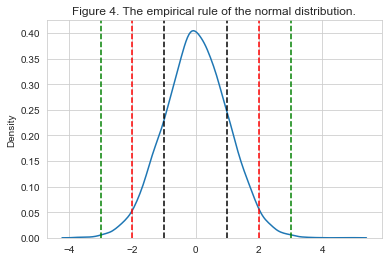

In [179]:
# Figure 4. The empirical rule of the normal distribution. 

sns.set_style('whitegrid')

sns.kdeplot(x).set(title="Figure 4. The empirical rule of the normal distribution.")

plt.axvline(1, color ="k", linestyle = "dashed")
plt.axvline(-1, color ="k", linestyle = "dashed")
plt.axvline(2, color ="r", linestyle = "dashed")
plt.axvline(-2, color ="r", linestyle = "dashed")
plt.axvline(3, color ="g", linestyle = "dashed")
plt.axvline(-3, color ="g", linestyle = "dashed")

Let s check if our randomly normal distribution follows this empirical rule. 

In [180]:
# We can quickly demonstrate it using "norm.cdf" from spicy.stats.(15, 16)

# "norm.cdf" creates a normal continuous random variable.(15, 16)

# Our mean and standard deviation (SD) values are:
mean = 0
SD = 1

# We assign values of cdf between one, two and three S.D. around the mean (16)
one_sd = norm.cdf(SD, mean, SD) - norm.cdf(-SD, mean, SD)
two_sd = norm.cdf(2 * SD, mean, SD) - norm.cdf(-2 * SD, mean, SD)
three_sd = norm.cdf(3 * SD, mean, SD) - norm.cdf(-3 * SD, mean, SD)

# Fraction of values within 1, 2 or 3 SDs:
print("Fraction of values within one SD =", round(((one_sd)*100),2))
print("Fraction of values within two SD =", round(((two_sd)*100),2))
print("Fraction of values within three SD =", round(((three_sd)*100),2))

Fraction of values within one SD = 68.27
Fraction of values within two SD = 95.45
Fraction of values within three SD = 99.73


Let s check this rule with a different value of standard deviation. 

In [181]:
mean1 = 0
SD1 = 3

one_sd1 = norm.cdf(SD1, mean1, SD1) - norm.cdf(-SD1, mean1, SD1)
two_sd1 = norm.cdf(2 * SD1, mean1, SD1) - norm.cdf(-2 * SD1, mean1, SD1)
three_sd1 = norm.cdf(3 * SD1, mean1, SD1) - norm.cdf(-3 * SD1, mean1, SD1)

print("Fraction of values within one SD =", round(((one_sd1)*100),2))
print("Fraction of values within two SD =", round(((two_sd1)*100),2))
print("Fraction of values within three SD =", round(((three_sd1)*100),2))

Fraction of values within one SD = 68.27
Fraction of values within two SD = 95.45
Fraction of values within three SD = 99.73


We get the same values, veryfing the empirical rule for the normal distribution. 

In summary, the normal distribution can take different shapes. And this shape will depend on the two parameters described here: the mean and the standard deviation (**Figure 5**).

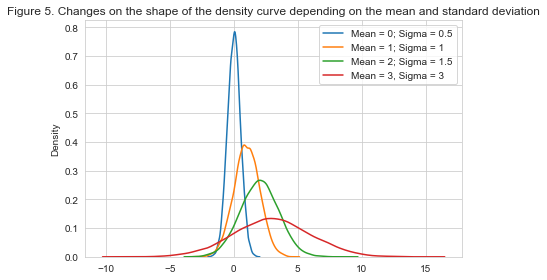

In [182]:
# Figure 5. Plot different density curves with different means and standard deviations. 

a1 = rng.normal(0,0.5,size)
b1 = rng.normal(1,1,size)
c1 = rng.normal(2,1.5,size)
d1 = rng.normal(3,3,size)

sns.set_style('whitegrid')

sns.kdeplot(a1, label = "Mean = 0; Sigma = 0.5").set(title="Figure 5. Changes on the shape of the density curve depending on the mean and standard deviation")
sns.kdeplot(b1, label = "Mean = 1; Sigma = 1")
sns.kdeplot(c1, label = "Mean = 2; Sigma = 1.5")
sns.kdeplot(d1, label = "Mean = 3, Sigma = 3")

plt.legend()
plt.tight_layout()

Changing the mean will shift the curve towards that mean value, this means we can change the position of the curve by altering the mean value while the shape of the curve remains intact.

## 2.3. NORMAL DISTRIBUTION FORMULA 

The normal distribution follows the following formula.(17)

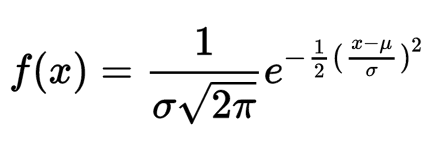

where:

    x = value of the variable or data being examined and f(x) the probability function
    μ = the mean
    σ = the standard deviation


The normal distribution density function simply accepts a data point along with a mean value and a standard deviation and throws a value which we call probability density.

Therefore, knowing the mean and the standard deviation we are able to calculate the probability of specific data ocurrance.

**Calculating probability of specific data occurance**

Let s create a normal distribution for the weights in over 12 years olds. Assuming a mean equal to 65kg and a standard deviation equal to 2.

In [183]:
# Creating the distribution (27)

# "np.arange" returns evenly spaced values within a given interval.
# let´s assume a minimum weight of 35kg and a max weight of 100 kg.
data = np.arange(35,100,0.1)

# "norm.pdf" to create a normal continuous random variable.(15)
# The location (loc) keyword specifies the mean.(15)
# The scale (scale) keyword specifies the standard deviation.(15)
pdf = norm.pdf(data , loc = 65, scale = 2 )

# Probability of the weight to be under 64kg.

# With "norm.cdf" we can calculate the probability that a random variable takes on a value.(15)
prob_1 = norm(loc = 65, scale = 2).cdf(64)

print("Probability of the weight to be under 64kg:", round(prob_1*100,2))

# Probability that the weight of the person will be between 65 and 75 Kg.

cdf_upper_limit = norm(loc = 65 , scale = 2).cdf(75)

cdf_lower_limit = norm(loc = 65 , scale = 2).cdf(65)

prob_2 = cdf_upper_limit - cdf_lower_limit

print("Probability that the weight of the person will be between 65 and 75 Kg:", round(prob_2*100,2))

# Probability that the weight of a person chosen randomly will be above 75kg

cdf_value = norm(loc = 65, scale = 2).cdf(75)

prob_3 = 1- cdf_value

print("Probability that the weight of a person chosen randomly will be above 75kg:", prob_3*100)

Probability of the weight to be under 64kg: 30.85
Probability that the weight of the person will be between 65 and 75 Kg: 50.0
Probability that the weight of a person chosen randomly will be above 75kg: 2.866515719235352e-05


## 3. PROPERTIES OF THE NORMAL DISTRIBUTION 
***

Looking at the characteristics of the mean and standard deviation, we can define some of the most important properties of the  normal distribution:

1. Normal distributions are defined by two parameters, the mean and the standard deviation.  
2. The mean, median and mode are equal.  
3. The values have relatively higher densities at the center of the distribution and relatively lower density in the tails. Another way to visualize this is by using the cumulative distribution functions (**Figure 6**).  
4. The Empirical Rule allows you to determine the proportion of values that fall within certain distances from the mean.  
5. The area under the bell curve is equal to 1.0.  
6. The distribution is symmetric about the mean—half the values fall below the mean and half above the mean. When the curve is asymmetrical then we have skewed distributions.(**Figure 7**)(3)  

**Figure 6** shows the cumulative distribution function of a random normal distribution with different values of mean and standard deviation. Showing that the probability of the random distribution taking a value is higher near to the mean.

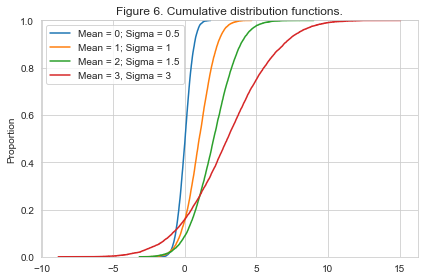

In [184]:
# Figure 6. Cumulative distribution functions. 

sns.set_style('whitegrid')

# "sns.ecdfplot" to plot empirical cumulative distribution functions.
sns.ecdfplot(a1, label = "Mean = 0; Sigma = 0.5").set(title="Figure 6. Cumulative distribution functions.")
sns.ecdfplot(b1, label = "Mean = 1; Sigma = 1")
sns.ecdfplot(c1, label = "Mean = 2; Sigma = 1.5")
sns.ecdfplot(d1, label = "Mean = 3, Sigma = 3")

plt.legend()
plt.tight_layout()

### 3.1. SKEWNESS

Skewness measures the degree of symmetry of a distribution. The normal distribution is symmetric and has a skewness of zero. Otherwise, it is considered a skewed distribution (**Figure 7**).(17)

Text(0.5, 1.0, 'Figure 7. Skewed distributions.')

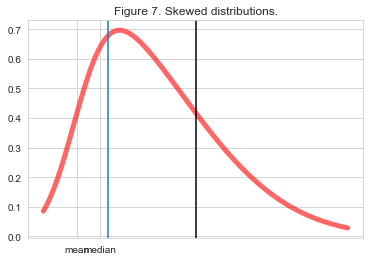

In [185]:
# Figure 7. Skewed distributions.(18)

sns.set_style('whitegrid')

# Create a figure and a set of subplots.
a = 4
fig, ax = plt.subplots(1, 1)

# "np.linspace" to return evenly spaced numbers over a specified interval.(20)
# "skewnorm.ppf" takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at.(19)
sk = np.linspace(skewnorm.ppf(0.01, a),
                skewnorm.ppf(0.99, a), 100)

# "skewnorm.pdf" to shift and scale the distribution use the loc and scale parameters.(19)
ax.plot(sk, skewnorm.pdf(sk, a),
       'r-', lw=5, alpha=0.6, label='skewnorm pdf')

# To plot a line in the axes for the mean and the median
plt.axvline(sk.mean(), color = 'black')
plt.axvline(np.median(skewnorm.pdf(sk, a)))
plt.xticks([x.mean(), np.median(skewnorm.pdf(x, a))], ['mean', 'median'])
plt.title("Figure 7. Skewed distributions.")

In a normal distribution, the mean and the median are the same number while the mean and median in a skewed distribution become different numbers. It is also noticeable that normal distributions have exactly the same tails (**Figure 1**) while skewed distributions have one tail longer than the other (**Figure 7**).(22)

The skewed distribution looks like a normal distribution with an extra shape parameter, α. The shape parameter skews the normal distribution to the left or right. However, if the skew distribution has a skew of zero, then it becomes the normal distribution.(22)


If α is less than zero, or negative skewness (left-skewness), then the left tail of the distribution is longer than the right tail; if α is more than zero, or positive skewness (right-skewness), then the right tail of the distribution is longer than the left.(17)

### 3.2. KURTOSIS 

Kurtosis measures the thickness of the tail ends of a distribution in relation to the tails of a distribution.(23) There are three different distributions depending on the kurtosis value:

1. Mesokurtic. Kurtosis = 3. The normal distribution has a kurtosis equal to 3.0, taking the classic bell shape.  
2. Leptokurtic. Kurtosis > 3. Distributions with larger kurtosis greater than 3.0 exhibit tail data exceeding the tails of the normal distribution (five or more standard deviations from the mean).  
3. Platykurtic. Kurtosis < 3.  These distributions exhibit tails that are generally less extreme ("skinnier") than the tails of the normal distribution.(**Figure 8**).(24,25)


**Figure 8.Distributions depending on kurtosis.**(25)

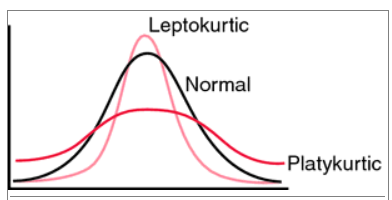

**What is the function of the Kurtosis measurement?**

Kurtosis indicates how much data resides in the tails and explains how often observations in some data sets fall in the tails vs. the center of a probability distribution.(24)

Distributions with a large kurtosis have more tail data than normally distributed data, which appears to bring the tails in toward the mean. Distributions with low kurtosis have fewer tail data, which appears to push the tails of the bell curve away from the mean.(24)  

**How to calculate the kurtosis value in the normal distribution?**

Kurtosis value = 3.0


[Text(0.5, 1.0, 'Figure 9. Kurtosis in a normal distribution.')]

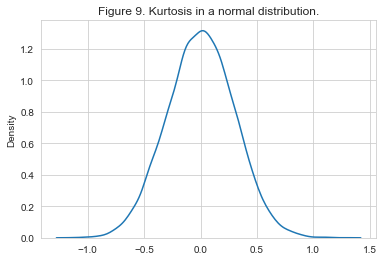

In [186]:
# First, we need a mean, a standard deviation, and a size for the normal distribution. 
k_mean = 0
k_sd = 0.3
k_size = 10000

# We are going to create a random normal distribution using the rng function from numpy as we did before.
k = rng.normal(k_mean,k_sd,k_size)

# From scipy.stats we are going to use the kurtosis function.
# Setting "fisher=False" does the calculation of the Pearson’s definition of kurtosis where the kurtosis value for normal distribution = 3.
print("Kurtosis value =", round(kurtosis(k, fisher=False),2))

# Finally we plot our distribution
sns.set_style('whitegrid')
sns.kdeplot(k, label = "Mesokurtic").set(title="Figure 9. Kurtosis in a normal distribution.")

With this example, the kurtosis for a normal distribution gets verified. Our randomly created normal distribution takes a kurtosis value equal to 3 with the classic bell shape.

### 3.3. AREA UNDER THE CURVE

According to the normal distribution properties, the area under the curve (AUC) for a normal distribution should be equal to 1. 

We are going to test this property simulating a dataset using a real one as reference. For this example, we are going to use the Wisconsin Breast Cancer dataset, which I have used in other exercises for other purposes (28) and it can be found in Kaggle.(29)

In [271]:
# pd.read_csv from pandas to read the dataset. 
realdata = pd.read_csv("data.csv")

# We keep only the diagnosis and radius mean feature for this example. 
df = realdata[["diagnosis","radius_mean"]]

# Since the dataset is divided in bening and malignant samples we are going to split the dataset according to this feature.
dfb = df.loc[df["diagnosis"] == "B"]
dfm = df.loc[df["diagnosis"] == "M"]

# We keep the diagnosis feature since the outcome is the same for the whole dataset. 
dfb_diagnosis = dfb["diagnosis"]
dfm_diagnosis = dfm["diagnosis"]

# "rng.random.normal" to create random sequence of numbers following a normal distribution.
# "np.mean","np.std","min()" and max() to calculate the mean, standard deviation, maximum and minimum values for each feature.(30,31,32,33)
# "np.clip" to limit the values of the array using the mininum and maximum values as reference.(34)
# The size of the dataframe will be iqual to the proportion of bening and malignant tumors within the real dataset: 357 bening samples and 212 malignant samples.

dfb_radius_mean = np.clip(rng.normal(np.mean(dfb["radius_mean"]),np.std(dfb["radius_mean"]),357),dfb["radius_mean"].min(),dfb["radius_mean"].max())
dfm_radius_mean = np.clip(rng.normal(np.mean(dfm["radius_mean"]),np.std(dfm["radius_mean"]),212),dfm["radius_mean"].min(),dfm["radius_mean"].max())

# Finally, using "pandas Dataframe", we will put together the variables in a single dataset.(35)
dsb = pd.DataFrame({"diagnosis": dfb_diagnosis,"radius_mean":dfb_radius_mean})
dsm = pd.DataFrame({"diagnosis": dfm_diagnosis,"radius_mean":dfm_radius_mean})

# "pd.concat" to concatenate the simulated datasets.(36)
# "ignore_index=True" to not use the index values along the concatenation axis.(36)
ds = pd.concat([dsb, dsm], ignore_index=True)

Our "ds" dataset is a mix of bening and malignant samples following a normal distribution. Due to this mix, when we plot a histogram the distribution looks skewed (**Figure 10**).

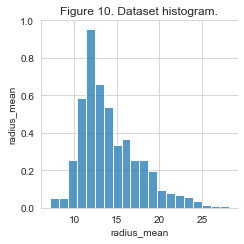

In [272]:
# Figure 10. Dataset histogram.
sns.set_style('whitegrid')
sns.pairplot(ds,height=3.5).set(title="Figure 10. Dataset histogram.")
plt.tight_layout()

However, when we plot splitting by diagnosis feature we can see how bening and malignant samples follow a normal distribution (**Figure 11**).

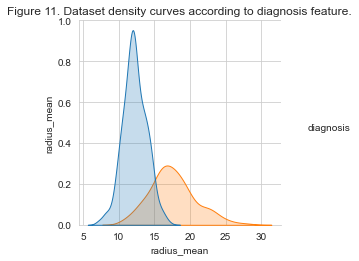

In [273]:
# Figure 11. Density curves according to diagnosis feature.
sns.pairplot(ds, hue="diagnosis",height=3.5).set(title="Figure 11. Dataset density curves according to diagnosis feature.")

Let´s calculate the area under the curve using sk.learn.(37)

In [278]:
# First, we need to reshape our feature "radius" in a 1-D array.(38)
x = np.reshape(ds[["radius_mean"]],(-1, 1))
# "np.ravel" to return a contiguous flattened array.(39)
y = np.ravel(ds[["diagnosis"]])

#split the dataset into training (70%) and testing (30%) sets. (37)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) 

# We are going to use the logistic regression model.
log_regression = LogisticRegression()

#fit the model using the training data. (37)
log_regression.fit(x_train,y_train)

#use model to predict probability that given y value is 1.(37)
y_pred_proba = log_regression.predict_proba(x_test)[::,1]

#calculate AUC of model.(37,38)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print("AUC score:", round(auc,2))

AUC score: 0.92


The result can be different each time we run the code as we are dealing with a distribution of data generated randomly. Last time checked the AUC score was 0.92.

## 4. DISCUSSION 
***

## **5. REFERENCES**

***

1. https://www.z-table.com/history-on-normal-distirbution.html  
2. https://higherlogicdownload.s3.amazonaws.com/AMSTAT/1484431b-3202-461e-b7e6-ebce10ca8bcd/UploadedImages/Classroom_Activities/HS_2__Origin_of_the_Normal_Curve.pdf  
3. https://statisticsbyjim.com/basics/normal-distribution/  
4. https://numpy.org/doc/stable/reference/random/generator.html  
5. https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html 
6. https://numpy.org/doc/stable/reference/generated/numpy.mean.html  
7. https://numpy.org/doc/stable/reference/generated/numpy.std.html  
8. https://seaborn.pydata.org/generated/seaborn.set_style.html  
9. https://seaborn.pydata.org/generated/seaborn.histplot.html  
10.https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html  
11.https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html  
12.https://seaborn.pydata.org/generated/seaborn.kdeplot.html  
13.https://www.tutorialspoint.com/matplotlib/matplotlib_histogram.html  
14.https://www.statology.org/density-curves/  
15.https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html  
16.https://www.geeksforgeeks.org/python-68-95-99-7-rule-in-statistics/  
17.https://www.investopedia.com/terms/n/normaldistribution.asp  
18.https://calc-again.readthedocs.io/en/latest/calc_notebooks/0.10_calc_distributions.html
19.https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html  
20.https://numpy.org/doc/stable/reference/generated/numpy.linspace.html  
21.https://stackoverflow.com/questions/60699836/how-to-use-norm-ppf  
22.https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/  
23.https://www.investopedia.com/terms/k/kurtosis.asp  
24.https://pyshark.com/kurtosis-in-python/  
25.https://medical-dictionary.thefreedictionary.com/Leptokurtic+distribution  
26.https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html  
27.https://www.askpython.com/python/normal-distribution  
28.https://github.com/RobVergano/PDA22.git  
29.Breast Cancer Wisconsin Dataset https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download  
30.https://numpy.org/doc/stable/reference/generated/numpy.mean.html  
31.https://numpy.org/doc/stable/reference/generated/numpy.std.html  
32.https://www.w3schools.com/python/ref_func_max.asp  
33.https://www.w3schools.com/python/ref_func_min.asp  
34.https://numpy.org/doc/stable/reference/generated/numpy.clip.html  
35.https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html  
36.https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html  
37.https://www.statology.org/auc-in-python/  
38.https://numpy.org/doc/stable/reference/generated/numpy.reshape.html  
39.https://numpy.org/doc/stable/reference/generated/numpy.ravel.html  
40.https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html